In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure

In [2]:
from sklearn.cluster import KMeans
from fcmeans import FCM

In [3]:
dataframe = pd.read_csv("D:\\Logistic_code\\code\\vrp\\clustering\\fuzzy_c_mean\\data2.csv")


In [4]:
dataframe


,X,Y,Demand
0,500,500,0
1,740,442,8
2,261,710,10
3,578,522,8
4,482,914,5
...,...,...,...
105,806,568,5
106,907,703,7
107,821,135,7
108,622,561,9


In [5]:
data = dataframe.to_numpy()

In [6]:
my_model = FCM(n_clusters=10) # we use two cluster as an example
my_model.fit(data[:,:2]) ## X, numpy array. rows:samples columns:features

In [7]:
def supervised_fuzzy_c_mean_clustering(num_cluster:int, data:np.ndarray, capacity:int):
    """
        num_cluster: number of vehicles. Can be increased if demand exceeds capacity
        data: data point and demand. Shape: [K, 3] with K is number of data point. Each row is (lat, lon, demand)
        capacity : vehicle capacity
    """
    cluster_center, weight_matrix, cluster_labels = None, None, None
    flag = True
    while flag:
        print(f"---------------Starting clustering with {num_cluster} vehicles---------------")
        ## Clustering
        my_model = FCM(n_clusters=num_cluster, max_iter=500) 
        my_model.fit(data[:,:2]) 
        cluster_center = my_model.centers
        cluster_labels = my_model.predict(data[:,:2])
        # cluster_center, weight_matrix, cluster_labels = fuzzy_c_means_clustering(num_cluster, data[:,:2])
        ## Check demand in each clusters
        is_exceeds = False
        for i in range(num_cluster):
            demand = np.sum(data[cluster_labels == i][:,2:3])
            if demand > capacity:
                print(f"Demand exceed at cluster {i} ({demand} > {capacity}). Increaseing number of vehicle to 1")
                is_exceeds = True
                num_cluster = num_cluster + 1
                break
        if not is_exceeds:
            flag = False
            print(f"Finishing clustering with number of vehicles {num_cluster}")

    return cluster_center, weight_matrix, cluster_labels, num_cluster

In [12]:
def supervised_k_mean_clustering(num_cluster:int, data:np.ndarray, capacity:int):
    """
        num_cluster: number of vehicles. Can be increased if demand exceeds capacity
        data: data point and demand. Shape: [K, 3] with K is number of data point. Each row is (lat, lon, demand)
        capacity : vehicle capacity
    """
    cluster_center, weight_matrix, cluster_labels = None, None, None
    flag = True
    while flag:
        print(f"---------------Starting clustering with {num_cluster} vehicles---------------")
        ## Clustering
        kmeans = KMeans(n_clusters=num_cluster, random_state=0, max_iter=1000).fit(data[:,:2]) 
        cluster_center = kmeans.cluster_centers_
        cluster_labels = kmeans.labels_
        # cluster_center, weight_matrix, cluster_labels = fuzzy_c_means_clustering(num_cluster, data[:,:2])
        ## Check demand in each clusters
        is_exceeds = False
        for i in range(num_cluster):
            demand = np.sum(data[cluster_labels == i][:,2:3])
            if demand > capacity:
                print(f"Demand exceed at cluster {i} ({demand} > {capacity}). Increaseing number of vehicle to 1")
                is_exceeds = True
                num_cluster = num_cluster + 1
                break
        if not is_exceeds:
            flag = False
            print(f"Finishing clustering with number of vehicles {num_cluster}")

    return cluster_center, weight_matrix, cluster_labels, num_cluster

In [12]:
cluster_center, weight_matrix, cluster_labels, num_cluster = supervised_fuzzy_c_mean_clustering(10, data, 66)

---------------Starting clustering with 10 vehicles---------------
Demand exceed at cluster 2 (121 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 11 vehicles---------------
Demand exceed at cluster 0 (70 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 12 vehicles---------------
Demand exceed at cluster 0 (74 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 13 vehicles---------------
Demand exceed at cluster 4 (93 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 14 vehicles---------------
Demand exceed at cluster 0 (68 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 15 vehicles---------------
Demand exceed at cluster 8 (70 > 66). Increaseing number of vehicle to 1
---------------Starting clustering with 16 vehicles---------------
Demand exceed at cluster 8 (74 > 66). Increaseing number of vehicle to 1
---------------Star

In [45]:
np.argwhere(cluster_labels == cluster_labels[5])

array([[ 5],
       [11],
       [46],
       [77]], dtype=int64)

In [44]:
cluster_labels[5]


13

In [13]:
def plot_points(cluster_labels:np.ndarray, cluster_center:np.ndarray, data:np.ndarray):
    figure(figsize=(14, 12), dpi=80)
    cluster_label_unique_len = len(np.unique(cluster_labels))
    cluster_color = np.random.rand(cluster_label_unique_len, 3)  

    ## Plot point
    point_color = cluster_color[cluster_labels]
    for i in range(data.shape[0]):
        point = data[i]
        plt.scatter(point[0], point[1], marker="o", c=[point_color[i]])

     ## plot cluster center
    plt.scatter(cluster_center[:,0], cluster_center[:,1], marker="x", c=[[0,0,0]])

    plt.show()

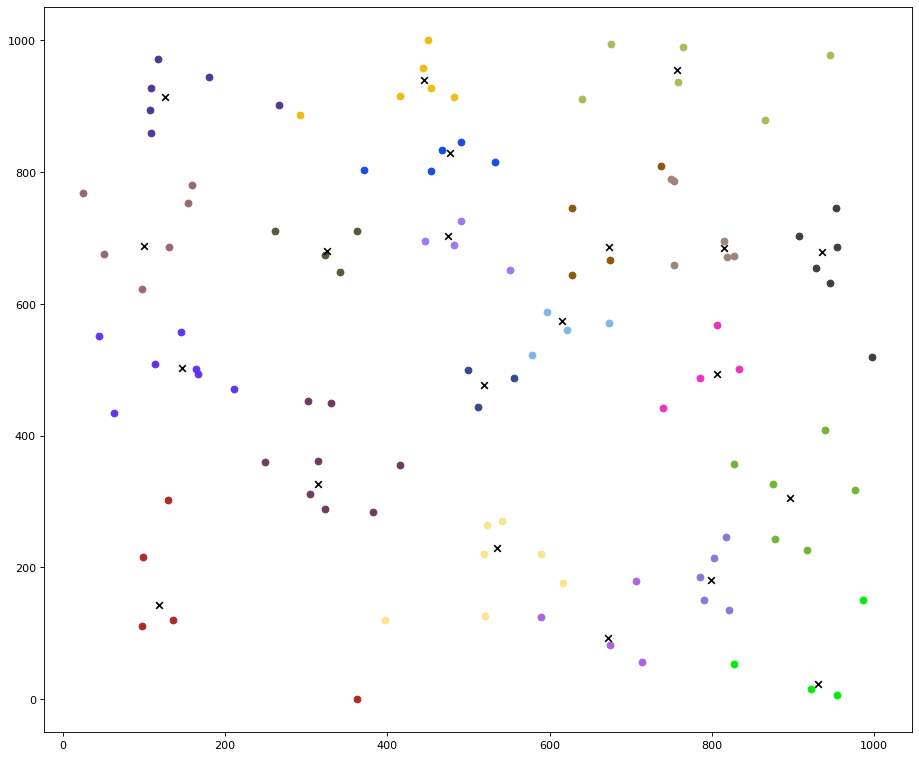

In [14]:
plot_points(cluster_labels, cluster_center, data[:,:2])
